In [1]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt

In [2]:
filename = './Data/WorldPop/ZMB_population_v1_0_gridded/ZMB_population_v1_0_gridded/' + 'ZMB_population_v1_0_gridded.tif'
filename_mastergrid = './Data/WorldPop/ZMB_population_v1_0_mastergrid.tif'

pop_raster = rasterio.open(filename)
pop_raster.shape

pop_rasterMaster = rasterio.open(filename_mastergrid)
pop_rasterMaster.shape

(11768, 14058)

In [3]:
def plot_raster(arr, title=None, figsize=(30,10)):
    """ helper function to plot a raster array """
    fig, ax = plt.subplots(figsize=figsize)
    plt.imshow(arr)
    plt.colorbar()
    plt.title(f'{title}')
    plt.xlabel('Column #')
    plt.ylabel('Row #')
    return fig, ax

In [4]:
pop_data = pop_raster.read(1)
pop_count = pop_data[pop_data>0].sum()
pop_data_mastergrid = pop_rasterMaster.read(1)


(<Figure size 2160x720 with 2 Axes>,
 <AxesSubplot:title={'center':'21672696.0'}, xlabel='Column #', ylabel='Row #'>)

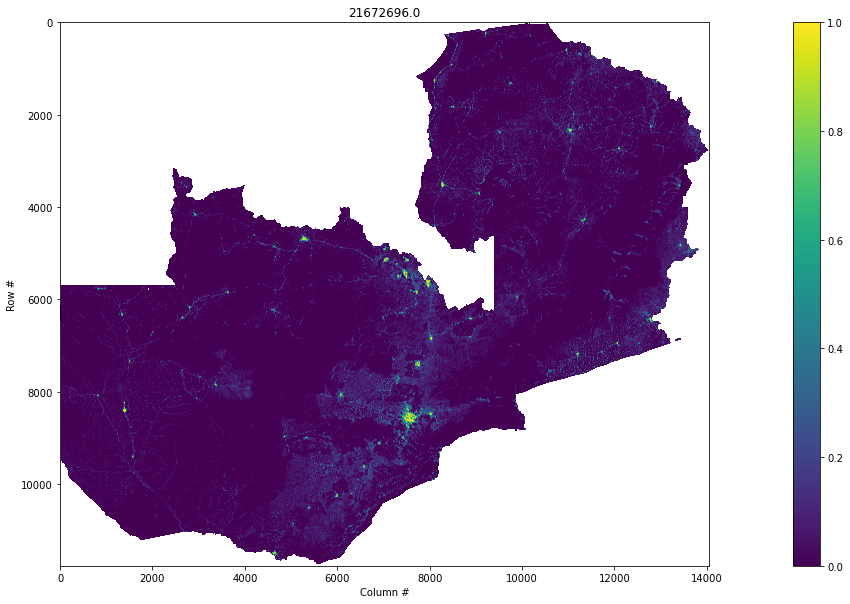

In [5]:
# print(pop_data_mastergrid)

pop_data_mastergrid[pop_data_mastergrid < 0] = np.nan

plot_raster(pop_data_mastergrid, title=pop_count)

In [6]:
import pandas as pd


In [7]:
data_folder = './Data/MTF Survey/mtf_zambia_data/'
filename = data_folder + 'EXPRESS SECTIONS.dta'
df = pd.read_stata(filename)

In [8]:
print(df)

      HouseholdID PROVINCE  DISTRICT TOWNSHIP_COMPOUND_VILLAGE LOCALITY  \
0         1016101  Central       3.0                    Mayota    Rural   
1         1016102  Central     101.0                    mayota    Rural   
2         1016103  Central       1.0                    mayuta    Rural   
3         1016104  Central       1.0                  chibombo    Rural   
4         1016105  Central       1.0                    mayota    Rural   
...           ...      ...       ...                       ...      ...   
3607     10191810  WESTERN       4.0             Imwiko, Mongu    Urban   
3608     10191811  WESTERN       4.0          Hellen  Compound    Urban   
3609     10191812  WESTERN       4.0             Imwiko, Mongu    Urban   
3610     10191813  WESTERN       4.0             Imwiko, Mongu    Urban   
3611     10191814  WESTERN       4.0             Imwiko, Mongu    Urban   

       EANUM     LOF  ENUMID  SUPID DOV  ...                C180_1  C180_2  \
0      161.0  Nyanja 

In [18]:
df.to_csv('datares.csv',index=False)

In [16]:
province=df['PROVINCE']
province = province.drop_duplicates()
print(province)

0             Central
321        Copperbelt
964           Eastern
1342          Luapula
1620           Lusaka
2389         Muchinga
2571    North western
2753         Northern
3011         Southern
3388          WESTERN
Name: PROVINCE, dtype: category
Categories (10, object): ['Central' < 'Copperbelt' < 'Eastern' < 'Luapula' ... 'North western' < 'Northern' < 'Southern' < 'WESTERN']


In [9]:
filename2= data_folder +'sample_weight.dta'
df2 = pd.read_stata(filename2)

In [10]:
print(df2)

      HouseholdID    hh_weight
0         5004514  5137.684082
1         5004506  2568.842041
2         5004509  1284.421021
3         5004504  1284.421021
4         5004510  2568.842041
...           ...          ...
3607      2321311          NaN
3608      5311405          NaN
3609      5322010          NaN
3610      2196901          NaN
3611      2196909          NaN

[3612 rows x 2 columns]


In [11]:
data_folder = './Data/WealthIndex/'
filename_wealth = data_folder + 'zmb_relative_wealth_index.csv'

In [12]:
data_wealth = pd.read_csv(filename_wealth)
data_wealth

,latitude,longitude,rwi,error
0,-11.469258,29.718018,-1.033,0.372
1,-9.156332,31.849365,-0.784,0.380
2,-10.304110,31.256103,-0.583,0.377
3,-17.025272,27.169190,-0.354,0.363
4,-14.338904,25.103760,-0.589,0.365
...,...,...,...,...
35542,-11.727545,33.277588,-0.459,0.353
35543,-13.998036,28.048096,-0.366,0.368
35544,-14.509144,23.104248,-0.714,0.366
35545,-9.958030,31.563721,-0.459,0.381


<AxesSubplot:xlabel='longitude', ylabel='latitude'>

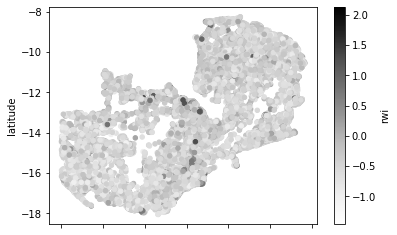

In [13]:
data_wealth.plot.scatter('longitude','latitude', c='rwi')